In [1]:

from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Concatenate, AdditiveAttention
from tensorflow.keras.models import Model
import numpy as np

from matplotlib import pyplot as plt
import tensorflow as tf

def plotHistoryLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
def plotHistoryAcc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def saveDictionary(dt, file):
        import pickle
        a_file = open(file, "wb")
        pickle.dump(dt, a_file)
        a_file.close()

def loadDictionary(file):
        import pickle
        a_file = open(file, "rb")
        dt = pickle.load(a_file)
        return dt

def load(model_name, source_token_dict_file,target_token_dict_file,target_token_dict_inv_file ):
        model = keras.models.load_model(model_name)
        s = loadDictionary(source_token_dict_file)
        t = loadDictionary(target_token_dict_file)
        t_inv = loadDictionary(target_token_dict_inv_file)
        return model, s, t, t_inv

batch_size = 16  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
MAX_SRC_LEN = 100
# Path to the data txt file on disk.
data_path = 'English2TraChinese.txt'# 'cmn-eng/cmn.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r') as f:
    lines = f.read().split('\n')

#Random shuffle lines
np.random.shuffle(lines)

for line in lines:
    if len(input_texts)>num_samples: break
    input_text, target_text = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    if len(input_text)>MAX_SRC_LEN: continue
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)


2025-05-04 14:14:52.698305: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-04 14:14:52.948327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746339293.079567   88546 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746339293.114638   88546 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 14:14:53.321872: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Number of samples: 10001
Number of unique input tokens: 73
Number of unique output tokens: 2383
Max sequence length for inputs: 99
Max sequence length for outputs: 41


I0000 00:00:1746339298.982170   88546 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13689 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


num_decoder_tokens: 2383
decoder_inputs: <KerasTensor shape=(None, 41, 2383), dtype=float32, sparse=False, name=keras_tensor_4>
encoder_states: [<KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_2>, <KerasTensor shape=(None, 256), dtype=float32, sparse=False, name=keras_tensor_3>]
encoder_outputs: <KerasTensor shape=(None, 99, 256), dtype=float32, sparse=False, name=keras_tensor_1>
decoder_outputs: <KerasTensor shape=(None, 41, 256), dtype=float32, sparse=False, name=keras_tensor_5>
attn_out: <KerasTensor shape=(None, 41, 256), dtype=float32, sparse=False, name=keras_tensor_8>
Epoch 1/100
  1/500 ━━━━━━━━━━━━━━━━━━━━ 8:08 979ms/step - acc: 0.0000e+00 - loss: 1.9202

I0000 00:00:1746339305.319341   88668 cuda_dnn.cc:529] Loaded cuDNN version 90300


500/500 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - acc: 0.0314 - loss: 1.5969 - val_acc: 0.0333 - val_loss: 1.4857
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.0335 - loss: 1.4862 - val_acc: 0.0340 - val_loss: 1.5017
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - acc: 0.0340 - loss: 1.4781 - val_acc: 0.0301 - val_loss: 1.4799
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - acc: 0.0347 - loss: 1.4754 - val_acc: 0.0379 - val_loss: 1.4686
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.0370 - loss: 1.4646 - val_acc: 0.0376 - val_loss: 1.4737
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.0401 - loss: 1.4559 - val_acc: 0.0371 - val_loss: 1.4514
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - acc: 0.0441 - loss: 1.4562 - val_acc: 0.0501 - val_loss: 1.4592
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - acc: 0.0467 - loss: 1.4428 - val_acc: 0.0452 - val_loss: 1.4500
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 14s

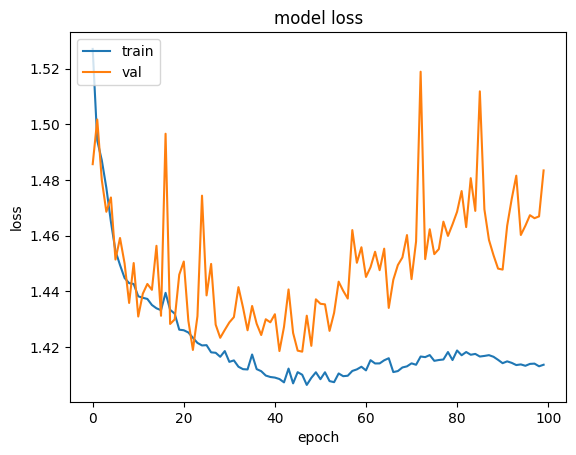

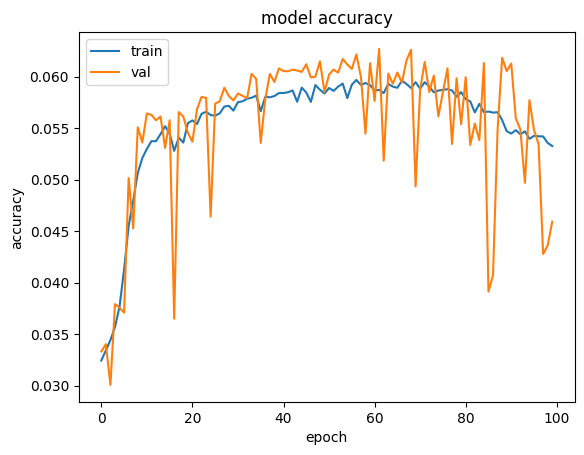

decoder_outputs.shape (None, 1, 256)
decoder_outputs.shape (None, 1, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
encoder_output_seqs.shape: (1, 99, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
-
Input sentence: Tom said that he lost his key.
Decoded sentence: 我們在我的。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
encoder_output_seqs.shape: (1, 99, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
-
Input sentence: Shouldn't you still be in bed?
Decoded sentence: 我們在我的。

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
encoder_output_seqs.shape: (1, 99, 256)
1/1 ━━━━━━

In [2]:
input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])
# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())

reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

# Define an input sequence and process it.
encoder_inputs = Input(shape=( max_encoder_seq_length, num_encoder_tokens))
encoder = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
print("num_decoder_tokens:", num_decoder_tokens)
decoder_inputs = Input(shape=( max_decoder_seq_length, num_decoder_tokens ))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
print("decoder_inputs:", decoder_inputs)
print("encoder_states:", encoder_states)
decoder_outputs, decode_state_h, decode_state_c = decoder_lstm(decoder_inputs, initial_state=encoder_states)
attn_layer = tf.keras.layers.AdditiveAttention()
print("encoder_outputs:", encoder_outputs) #None 95 256 
print("decoder_outputs:", decoder_outputs) #None 34 256 
attn_out = attn_layer([decoder_outputs, encoder_outputs])
print("attn_out:", attn_out) #None 34(src_len) 256
concatenate = Concatenate(axis=2, name='concat_layer')
decoder_concat_input = concatenate([decoder_outputs, attn_out])

decoder_dense = Dense(num_decoder_tokens, activation='softmax')
#decoder_dense = TimeDistributed(decoder_dense, name='time_distributed_layer')

decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
#print("encoder_input_data: ", encoder_input_data) #(None 85 68)
#print("decoder_input_data: ", decoder_input_data)  #(None 26 1230)
#print("decoder_target_data: ", decoder_target_data)  #(None, 26, 1230)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
plotHistoryLoss(history)
plotHistoryAcc(history)
# Save model
model.save('s2s.h5')
saveDictionary(input_token_index, 'input_token_index.pickle')
saveDictionary(target_token_index, 'target_token_index.pickle')
saveDictionary(reverse_target_char_index, 'reverse_target_char_index.pickle')
"""
model, input_token_index, target_token_index, reverse_target_char_index = load('s2s.h5', 'input_token_index.pickle','target_token_index.pickle','reverse_target_char_index.pickle' )
"""
# Later on, you can do :
#from keras.models import load_model
#model = load_model('s2s.h5')

# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states


# Define sampling models
encoder_model = Model(encoder_inputs, [encoder_outputs] + encoder_states)

Input_encoder_outputs = Input(shape=(max_encoder_seq_length,latent_dim,)) #for attention, encoder_outputs
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_inputs = Input(shape=( 1 , num_decoder_tokens ))
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)

print("decoder_outputs.shape", decoder_outputs.shape)
print("decoder_outputs.shape", decoder_outputs.shape)

attn_out = attn_layer([decoder_outputs,Input_encoder_outputs])
decoder_concat_input = concatenate([decoder_outputs, attn_out])
decoder_outputs = decoder_dense(decoder_concat_input)
decoder_states = [state_h, state_c]

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs + [Input_encoder_outputs], #+ : list concatenation
    [decoder_outputs] + decoder_states)

encoder_model.save('encoder_model.h5')
decoder_model.save('decoder_model.h5')

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    encoder_output_seqs, states_h, states_c = encoder_model.predict(input_seq)
    states_value=[states_h, states_c]
    print("encoder_output_seqs.shape:", encoder_output_seqs.shape)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value + [encoder_output_seqs])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char #generate the char with the max prob.

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

def test(input_text_example):
    #input_text_example="Tom's daughter pretended not to know him when he came to pick her up from school in his battered old car."
    encoder_input_data_example = np.zeros(
    (1, max_encoder_seq_length, num_encoder_tokens), dtype='float32')
    print(encoder_input_data_example.shape)
    for t, char in enumerate(input_text_example):
      encoder_input_data_example[0, t, input_token_index[char]] = 1.
    decoded_sentence_example = decode_sequence(encoder_input_data_example)
    print('-')
    print('Input sentence:', input_text_example)
    print('Decoded sentence:', decoded_sentence_example)
a=input("enter an english sentence:")
test(a)

In [8]:
import random

sample_indices = random.sample(range(len(input_texts)), 30)

for idx in sample_indices:
    input_seq = encoder_input_data[idx:idx+1]
    decoded = decode_sequence(input_seq)
    
    print(f"原文（英文）    : {input_texts[idx]}")
    ref = target_texts[idx].strip('\t\n')
    print(f"模型翻譯結果    : {decoded.strip()}")
    print('-' * 60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
encoder_output_seqs.shape: (1, 99, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
原文（英文）    : The king governed the country.
模型翻譯結果    : 我們在我的。
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
encoder_output_seqs.shape: (1, 99, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
原文（英文）    : Tom is about to fall asleep.
模型翻譯結果    : 我們在我的。
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
encoder_output_seqs.shape: (1,

2025-05-04 17:18:57.251236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746350337.263378  313232 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746350337.266695  313232 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 17:18:57.281071: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


line: Hi.	嗨。
line: Hi.	你好。
line: Run.	你用跑的。
line: Wait!	等等！
line: Hello!	你好。
line: I try.	讓我來。
line: I won!	我贏了。
line: Oh no!	不會吧。
line: Cheers!	乾杯!
line: He ran.	他跑了。
line: Hop in.	跳進來。
line: I lost.	我迷失了。
line: I quit.	我退出。
line: I'm OK.	我沒事。
line: Listen.	聽著。
line: No way!	不可能！
line: No way!	沒門！
line: Really?	你確定？
line: Try it.	試試吧。
line: We try.	我們來試試。
line: Why me?	為什麽是我？
line: Ask Tom.	去問湯姆。
line: Be calm.	冷靜點。
line: Be fair.	公平點。
line: Be kind.	友善點。
line: Be nice.	和氣點。
line: Call me.	聯系我。
line: Call us.	聯系我們。
line: Come in.	進來。
line: Get Tom.	找到湯姆。
line: Get out!	滾出去！
line: Go away!	走開！
line: Go away!	滾！
line: Go away.	走開！
line: Goodbye!	再見！
line: Goodbye!	告辭！
line: Hang on!	等一下！
line: He came.	他來了。
line: He runs.	他跑。
line: Help me.	幫我一下。
line: Hold on.	堅持。
line: Hug Tom.	抱抱湯姆！
line: I agree.	我同意。
line: I'm ill.	我生病了。
line: I'm old.	我老了。
line: It's OK.	沒關系。
line: It's me.	是我。
line: Join us.	來加入我們吧。
line: Keep it.	留著吧。
line: Kiss me.	吻我。
line: Perfect!	完美！
line: See you.	再見！
line

I0000 00:00:1746350340.287166  313232 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13689 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 73)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ 2474)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, None,     │    337,920 │ input_layer[0][0] │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │  2,796,544 │ input_layer_1[0]… │
│                     │ 256), (None,      │            │ lstm[0][1],       │
│                     │ 256), (None,      │            │ lstm[0][2]        │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, None, 256) │          0 │ lstm_1[0][0],     │
│ (Attention)         │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, None, 512) │          0 │ attention[0][0],  │
│ (Concatenate)       │                   │            │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │  1,269,162 │ concatenate[0][0] │
│                     │ 2474)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,403,626 (16.80 MB)

 Trainable params: 4,403,626 (16.80 MB)

 Non-trainable params: 0 (0.00 B)

2025-05-04 17:19:03.994622: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3166720000 exceeds 10% of free system memory.
2025-05-04 17:19:06.113819: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3166720000 exceeds 10% of free system memory.
2025-05-04 17:19:07.439146: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3166720000 exceeds 10% of free system memory.
2025-05-04 17:19:08.210153: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3166720000 exceeds 10% of free system memory.


Epoch 1/100


I0000 00:00:1746350350.529160  314513 cuda_dnn.cc:529] Loaded cuDNN version 90300


200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.0506 - loss: 2.2755 - val_accuracy: 0.0560 - val_loss: 2.6710
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0585 - loss: 1.9852 - val_accuracy: 0.0553 - val_loss: 2.6807
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0594 - loss: 1.9887 - val_accuracy: 0.0561 - val_loss: 2.6596
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0591 - loss: 1.9815 - val_accuracy: 0.0498 - val_loss: 2.6558
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0602 - loss: 1.9878 - val_accuracy: 0.0585 - val_loss: 2.6536
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0612 - loss: 1.9823 - val_accuracy: 0.0606 - val_loss: 2.6757
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0601 - loss: 1.9874 - val_accuracy: 0.0597 - val_loss: 2.6460
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0616 - loss: 1.9840 - val_accuracy

2025-05-04 17:25:22.938874: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 32358656 bytes after encountering the first element of size 32358656 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1055 - loss: 1.7409 - val_accuracy: 0.1028 - val_loss: 2.4389
Epoch 73/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1061 - loss: 1.7320 - val_accuracy: 0.0990 - val_loss: 2.4980
Epoch 74/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.1061 - loss: 1.7367 - val_accuracy: 0.1052 - val_loss: 2.4234
Epoch 75/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1048 - loss: 1.7387 - val_accuracy: 0.1026 - val_loss: 2.4369
Epoch 76/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.1061 - loss: 1.7316 - val_accuracy: 0.1061 - val_loss: 2.4284
Epoch 77/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1063 - loss: 1.7308 - val_accuracy: 0.1034 - val_loss: 2.4461
Epoch 78/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1064 - loss: 1.7264 - val_accuracy: 0.1026 - val_loss: 2.4469
Epoch 79/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.1073 - loss: 1.7322 - val_a

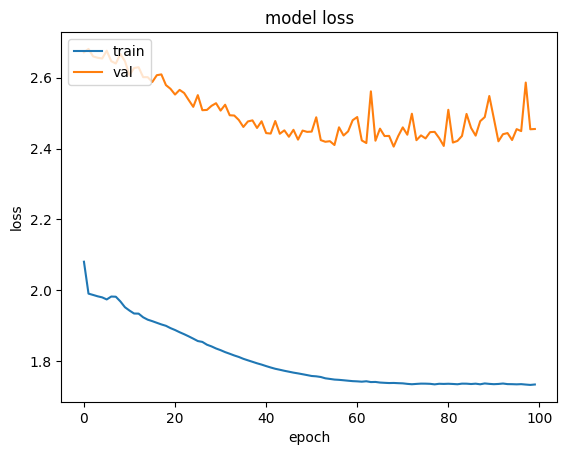

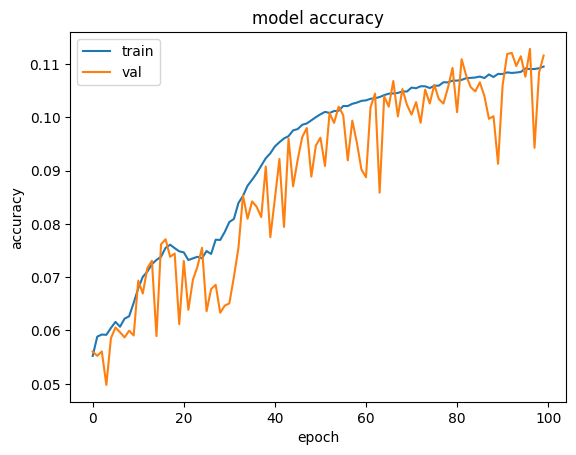

-
Input sentence: Hi.
Decoded sentence: 我們在。

-
Input sentence: Hi.
Decoded sentence: 我們在。

-
Input sentence: Run.
Decoded sentence: 你能的。

-
Input sentence: Wait!
Decoded sentence: 你能的。

-
Input sentence: Hello!
Decoded sentence: 你是我的。

-
Input sentence: I try.
Decoded sentence: 我不要一個。

-
Input sentence: I won!
Decoded sentence: 我不要一個。

-
Input sentence: Oh no!
Decoded sentence: 你能的。

-
Input sentence: Cheers!
Decoded sentence: 你能的。

-
Input sentence: He ran.
Decoded sentence: 我不要一個。

-
Input sentence: Hop in.
Decoded sentence: 你是我的。

-
Input sentence: I lost.
Decoded sentence: 我不要一個。

-
Input sentence: I quit.
Decoded sentence: 我不要一個。

-
Input sentence: I'm OK.
Decoded sentence: 我不要一個。

-
Input sentence: Listen.
Decoded sentence: 你是我的。

-
Input sentence: No way!
Decoded sentence: 你能的。

-
Input sentence: No way!
Decoded sentence: 你能的。

-
Input sentence: Really?
Decoded sentence: 你能的。

-
Input sentence: Try it.
Decoded sentence: 你是我的。

-
Input sentence: We try.
Decoded sentence: 我們在。

-

'你是我的。\n'

In [1]:
from __future__ import print_function
import numpy as np
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Attention, Dot, Activation, TimeDistributed
from tensorflow.keras.models import Model

def plotHistoryLoss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plotHistoryAcc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def saveDictionary(dt, file):
    import pickle
    a_file = open(file, "wb")
    pickle.dump(dt, a_file)
    a_file.close()
        
def loadDictionary(file):
    import pickle
    a_file = open(file, "rb")
    dt = pickle.load(a_file)
    return dt

def load(model_name, source_token_dict_file, target_token_dict_file, target_token_dict_inv_file):
    model = tf.keras.models.load_model(model_name)
    s = loadDictionary(source_token_dict_file)
    t = loadDictionary(target_token_dict_file)
    t_inv = loadDictionary(target_token_dict_inv_file)
    return model, s, t, t_inv

# Parameters
batch_size = 64  # Batch size for training
epochs = 100  # Number of epochs to train for
latent_dim = 256  # Latent dimensionality of the encoding space
num_samples = 16000  # Number of samples to train on
data_path = 'English2TraChinese.txt'  # Path to the data txt file on disk

# Vectorize the data
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r') as f:
    lines = f.read().split('\n')
for line in lines[0: min(num_samples, len(lines) - 1): 1]:  # Front part
    if len(line) == 0: 
        continue
    print("line:", line)
    input_text, target_text = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

# Create dictionaries for indexing
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict([(char, i) for i, char in enumerate(target_characters)])
# Reverse-lookup token index to decode sequences back to something readable
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

# Prepare the data
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

# Create the Seq2Seq model with attention
# Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# Attention mechanism
attention = Attention()
context_vector = attention([decoder_outputs, encoder_outputs])
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs])

# Output projection
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_combined_context)

# Define and compile the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(
    [encoder_input_data, decoder_input_data], 
    decoder_target_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

# Plot training history
plotHistoryLoss(history)
plotHistoryAcc(history)

# Save the model
model.save('s2s_attention.h5')
saveDictionary(input_token_index, 'input_token_index.pickle')
saveDictionary(target_token_index, 'target_token_index.pickle')
saveDictionary(reverse_target_char_index, 'reverse_target_char_index.pickle')

# Inference models
# Encoder model
encoder_model = Model(encoder_inputs, [encoder_outputs] + encoder_states)

# Decoder model for inference
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
encoder_outputs_input = Input(shape=(max_encoder_seq_length, latent_dim))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]

# Attention in inference mode
context_vector = attention([decoder_outputs, encoder_outputs_input])
decoder_combined_context = Concatenate(axis=-1)([context_vector, decoder_outputs])
decoder_outputs = decoder_dense(decoder_combined_context)

decoder_model = Model(
    [decoder_inputs, encoder_outputs_input] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

encoder_model.save('encoder_model_attention.h5')
decoder_model.save('decoder_model_attention.h5')

# Function to decode a sequence with attention
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    encoder_outputs, state_h, state_c = encoder_model.predict(input_seq, verbose=0)
    states_value = [state_h, state_c]

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq, encoder_outputs] + states_value, verbose=0)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length or find stop character.
        if sampled_char == '\n' or len(decoded_sentence) > max_decoder_seq_length:
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

# Test on some examples from the training set
for seq_index in range(20):  # Reduced from 100 to 20 for brevity
    # Take one sequence (part of the training set) for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

# Function to test with any input text
def test(input_text_example):
    encoder_input_data_example = np.zeros(
        (1, max_encoder_seq_length, num_encoder_tokens), dtype='float32')
    
    # Check if the input text contains characters not in the training set
    for char in input_text_example:
        if char not in input_token_index:
            print(f"Warning: Character '{char}' is not in the training vocabulary.")
            return "Cannot translate: Input contains unknown characters"
    
    for t, char in enumerate(input_text_example):
        encoder_input_data_example[0, t, input_token_index[char]] = 1.
    
    decoded_sentence_example = decode_sequence(encoder_input_data_example)
    print('-')
    print('Input sentence:', input_text_example)
    print('Decoded sentence:', decoded_sentence_example)
    return decoded_sentence_example

# Test with a custom input
test_sentence = "Hello, how are you today?"
test(test_sentence)

In [2]:
import random

sample_indices = random.sample(range(len(input_texts)), 30)

for idx in sample_indices:
    input_seq = encoder_input_data[idx:idx+1]
    decoded = decode_sequence(input_seq)
    
    print(f"English: {input_texts[idx]}")
    print(f"Translate: {decoded.strip()}")
    print("-" * 60)


English: Shouldn't Tom be doing this, too?
Translate: 你能的。
------------------------------------------------------------
English: She finally reached the hotel.
Translate: 你能的。
------------------------------------------------------------
English: The Italians often drink coffee.
Translate: 我們在。
------------------------------------------------------------
English: They live in peace.
Translate: 我們在。
------------------------------------------------------------
English: Will you stay at home tonight?
Translate: 你能的。
------------------------------------------------------------
English: Maybe you'll succeed.
Translate: 我不要一個。
------------------------------------------------------------
English: Let's assume that'll happen.
Translate: 你是我的。
------------------------------------------------------------
English: What's the purpose of your trip?
Translate: 你能的。
------------------------------------------------------------
English: I go by the nickname "Itch."
Translate: 我不要一個。
--------------------

In [3]:
a=input("enter an english sentence:")
test(a)

-
Input sentence: hello
Decoded sentence: 你能的。



'你能的。\n'